# Borrador Proyecto IMT-2200 Grupo 28


Este jupyter notebook tiene como proposito hacer el analisis de admision a la educacion superior dentro de los años 20xx'2024.
Esta echo de manera explicativa con graficos y interpretaciones para cada caso, se recomienda ir directo a la seccion de Interpretacion para saltarse la parte tecnica.


## Índice

- **Import de librería**

- **Lectura de archivos**
    - Leer el archivo de datos
    - Vista previa de los datos

- **Limpieza de datos**
    - Eliminar null y datos inconsistentes
    - Corregir errores
    - Tratar con duplicados
    - Renombrar columnas

- **Análisis de los Datos(EDA)**
    - Juntar bases
    - Hacer gráficos
    - ...

- **Conclusiones**



## Import de librerias a utilizar


- **Pandas**: Creación del DataFrame, su limpieza, joins, groupby, etc.
- **Numpy**: Pasar algunos datos a arreglos, vectores y matrices.
- **Matplotlib**: Gráficos.
- **Plotly**: Gráficos interactivos para la exploración y visualización.
- **...**


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from copy import deepcopy as dcopy
#import geopandas as gpd


## Lectura de Archivos

**-Leer el archivo de datos**

In [48]:
## no eliminar, me sirvio para generar mi codigo, saco ideas de aqui para la lectura de los demas, cuando sea necesario...
dataframes = []
print("si")
#idea, crear el dataframe
for num in range(2004 ,2026):
    dataframe_actual = []
    num = str(num)
    ruta = Path(f"raw_data/{num}")
    csv = ruta.glob("**/*.csv")
    exel = ruta.glob("**/*.xslx")
    
    for archivo in csv:
        dataframe_actual.append(pd.read_csv(archivo , sep = ";" , low_memory=False))
    for archivo_e in exel:
        #excel da problemitas xdddd
        try:
            dataframe_actual.append(pd.read_excel(archivo_e , engine = "openpyxl"))
        finally:
            pass

    dataframes.append(pd.concat(dataframe_actual, axis = 0))


                

si


In [72]:
adm = []   # adm> lista con  df admision por years 

#archivos de admision estan en  ArchivoC_Adm20xx
print("Iniciando lectura ... \n \n")
for num in range(2004 ,2026):
    ruta = Path(f"raw_data/{num}")
    csv = ruta.glob(f"**/ArchivoC_Adm{num}*.csv")
    
    for archivo in csv:
        print(archivo)
        adm.append(pd.read_csv(archivo , sep = ";" , low_memory=False))
if len(adm) == 22:
    print("\n\nLectura correcta datos admision 2004-2025")
else:
    print("\n\n Error en la lectura de datos, faltan archivos/mala lectura")

Iniciando lectura ... 
 

raw_data\2004\PROCESO-DE-ADMISIÓN-2004-RENDICIÓN-17-12-2024T15-39-17\Rinden_Admisión2004\ArchivoC_Adm2004.csv
raw_data\2005\PROCESO-DE-ADMISIÓN-2005-RENDICIÓN-17-12-2024T15-43-59\Rinden_Admisión2005\ArchivoC_Adm2005.csv
raw_data\2006\PROCESO-DE-ADMISIÓN-2006-RENDICIÓN-17-12-2024T15-50-29\Rinden_Admisión2006\ArchivoC_Adm2006.csv
raw_data\2007\PROCESO-DE-ADMISIÓN-2007-RENDICIÓN-17-12-2024T15-57-04\Rinden_Admisión2007\ArchivoC_Adm2007.csv
raw_data\2008\PROCESO-DE-ADMISIÓN-2008-RENDICIÓN-17-12-2024T16-00-49\Rinden_Admisión2008\ArchivoC_Adm2008.csv
raw_data\2009\PROCESO-DE-ADMISIÓN-2009-RENDICIÓN-17-12-2024T16-10-42\Rinden_Admisión2009\ArchivoC_Adm2009.csv
raw_data\2010\PROCESO-DE-ADMISIÓN-2010-RENDICIÓN-17-12-2024T16-13-20\Rinden_Admisión2010\ArchivoC_Adm2010.csv
raw_data\2011\PROCESO-DE-ADMISIÓN-2011-RENDICIÓN-17-12-2024T16-15-41\Rinden_Admisión2011\ArchivoC_Adm2011.csv
raw_data\2012\PROCESO-DE-ADMISIÓN-2012-RENDICIÓN-17-12-2024T16-18-42\Rinden_Admisión2012\Archi

**-Vista previa de los datos**

In [73]:
adm[0].head()

,ID_aux,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,PROM_NOTAS,PTJE_NEM
0,id_001160071115,3,T1,1,1,201.0,469,457,437,426,63,682
1,id_0016900171627,3,H2,5,3,240.0,492,457,513,0,53,481
2,id_0016900571641,3,T1,5,2,225.0,391,442,0,396,48,376
3,id_0028900472899,3,H1,1,8,415.0,353,487,402,0,48,373
4,id_004500078456,2,H2,1,10,510.0,430,425,451,0,54,501


In [74]:
adm[21].head()

,ID_aux,RBD,COD_ENS,GRUPO_DEPENDENCIA,RAMA_EDUCACIONAL,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,PROMEDIO_NOTAS,PORC_SUP_NOTAS,...,MATE2_REG_ANTERIOR,HCSOC_REG_ANTERIOR,CIEN_REG_ANTERIOR,MODULO_REG_ANTERIOR,CLEC_INV_ANTERIOR,MATE1_INV_ANTERIOR,MATE2_INV_ANTERIOR,HCSOC_INV_ANTERIOR,CIEN_INV_ANTERIOR,MODULO_INV_ANTERIOR
0,id_815728178577,11284.0,363.0,3.0,H2,1,6.0,6101.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_985329876535,20356.0,363.0,2.0,H2,1,4.0,4101.0,"6,55",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_767127676717,14846.0,363.0,2.0,H2,1,5.0,5101.0,"6,6",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_112621173264,NaN,NaN,NaN,NaN,5,NaN,NaN,"6,15",10,...,616.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_497424971745,22633.0,363.0,2.0,H2,1,14.0,14101.0,"6,4",10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Nota: Se me ocurrió la idea de visualizar cuánto sube en promedio el puntaje de la gente que da la PAES por segunda vez. 
###### ¿Vale la pena volver a darla?


## Limpieza de datos

-**Eliminar null y datos inconsistentes**


In [75]:
for y in range(len(adm)):
    adm[y].fillna(0,inplace=True)
    


In [76]:
adm[0].head()

,ID_aux,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,PROM_NOTAS,PTJE_NEM
0,id_001160071115,3,T1,1,1,201.0,469,457,437,426,63,682
1,id_0016900171627,3,H2,5,3,240.0,492,457,513,0,53,481
2,id_0016900571641,3,T1,5,2,225.0,391,442,0,396,48,376
3,id_0028900472899,3,H1,1,8,415.0,353,487,402,0,48,373
4,id_004500078456,2,H2,1,10,510.0,430,425,451,0,54,501


In [77]:
adm[8].head()

,ID_aux,RBD,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,MODULO_ACTUAL,LENG_ANTERIOR,MATE_ANTERIOR,HCSO_ANTERIOR,CIEN_ANTERIOR,MODULO_ANTERIOR,PROM_NOTAS,PTJE_NEM
0,id_0000900270000,7,3,T3,1,15,15101.0,312,418,341,0,0,0,0,0,0,0,61,641
1,id_0000900270002,12547,2,H1,1,15,15101.0,507,516,598,0,0,0,0,0,0,0,64,702
2,id_0000900270003,342,2,H1,1,2,2101.0,557,653,0,589,QUI,0,0,0,0,0,57,558
3,id_0000900270005,12610,3,T1,1,15,15101.0,363,418,306,0,0,0,0,0,0,0,59,601
4,id_0000900270007,12610,3,T1,1,15,15101.0,339,383,370,0,0,0,0,0,0,0,59,601


**-Corregir errores**


**-Tratar con duplicados**


**-Renombrar columnas**

### Pregunta 1.
###### ¿Cuántas personas se inscribieron en cada periodo de admisión entre 2004 y 2025?

In [78]:
tmp =[]
for x in range(len(adm)):
    tmp.append(adm[x].shape[0])
print(tmp)

[153982, 169888, 176778, 212889, 218261, 243809, 253236, 252402, 242661, 244707, 243596, 257852, 266494, 269351, 274498, 278287, 292091, 238818, 254191, 293865, 306497, 311084]


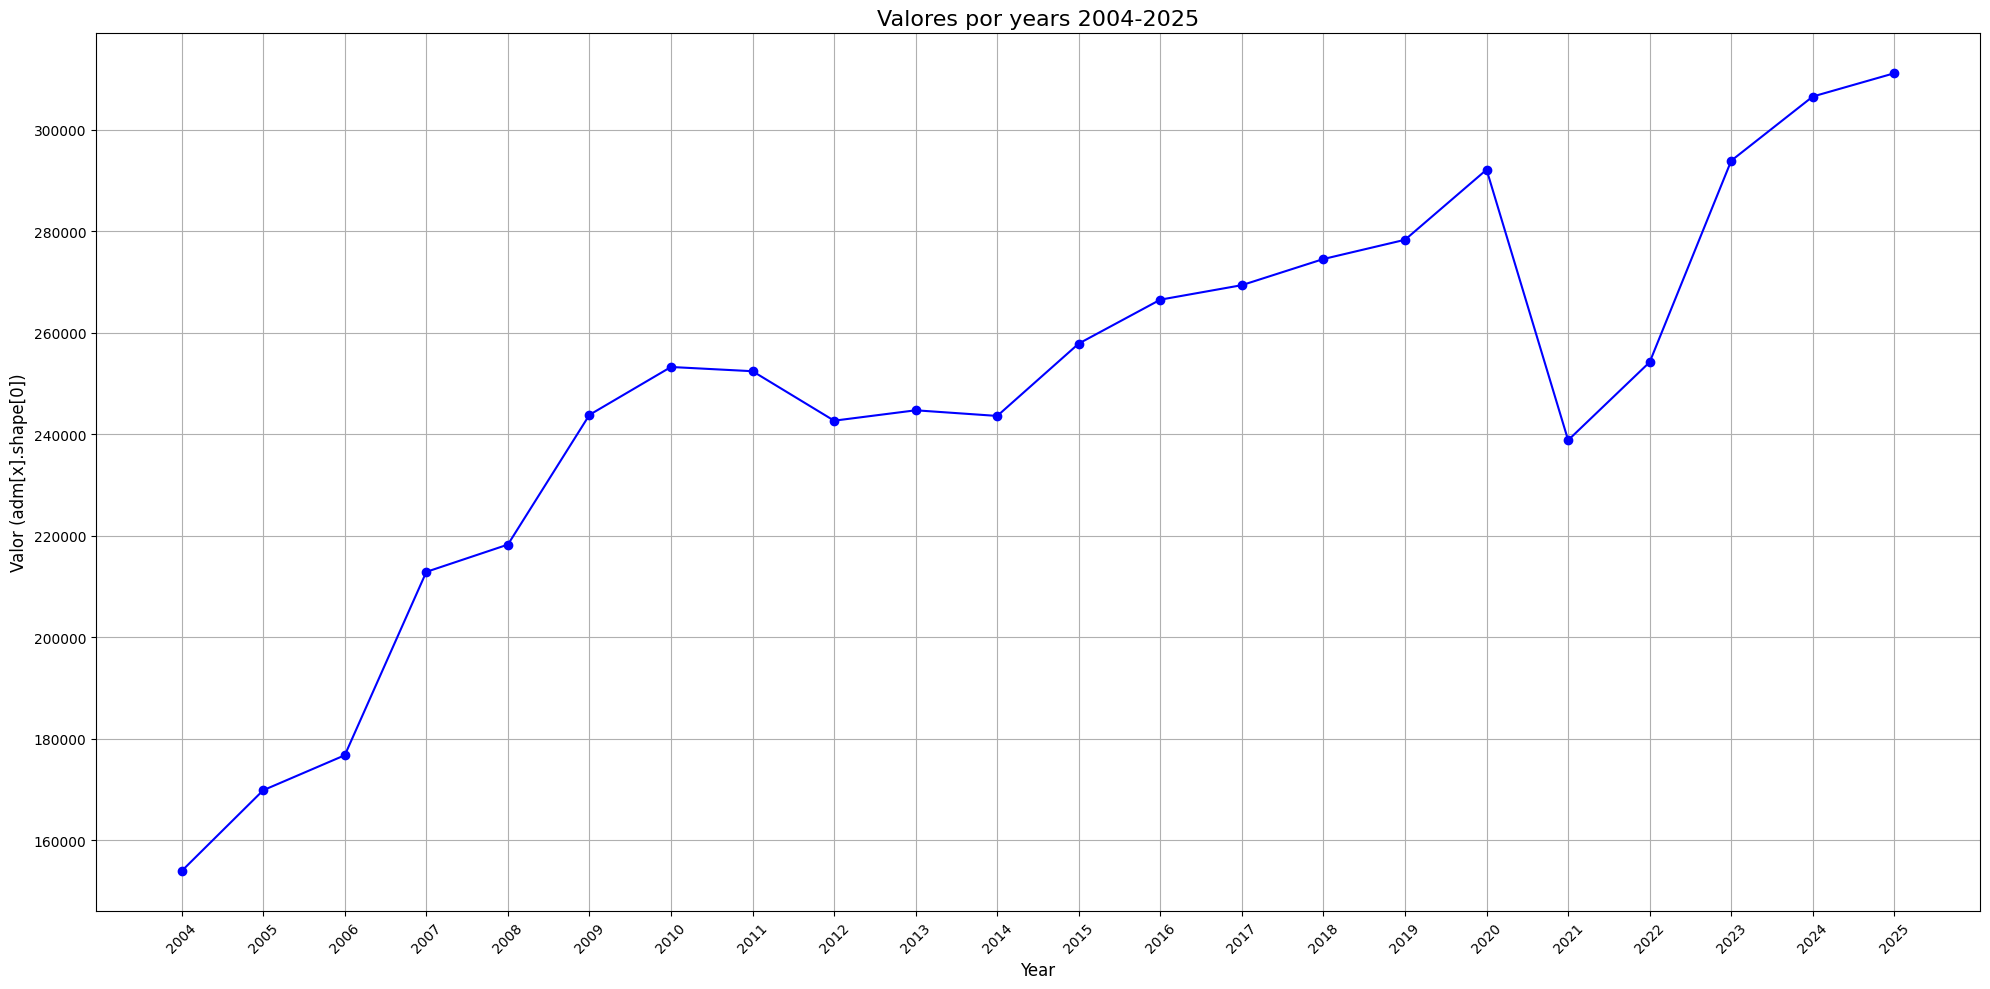

In [79]:
tmp = [153982, 169888, 176778, 212889, 218261,
       243809, 253236, 252402, 242661, 244707,
       243596, 257852,266494, 269351, 274498,
       278287, 292091,238818, 254191, 293865,
       306497, 311084]

years = list(range(2004, 2026))


plt.figure(figsize=(20, 10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por years 2004-2025', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

##### Podemos ver el grafico como ha habiado un aumento en las inscripciones a la prueba de educacion superios.
##### A su vez, logramos identificar la cantidad de inscripciones por año.

### Pregunta 2.
###### ¿Hubo un aumento en las inscripciones en los periodos de transición (PSU/PTU/PAES)? 

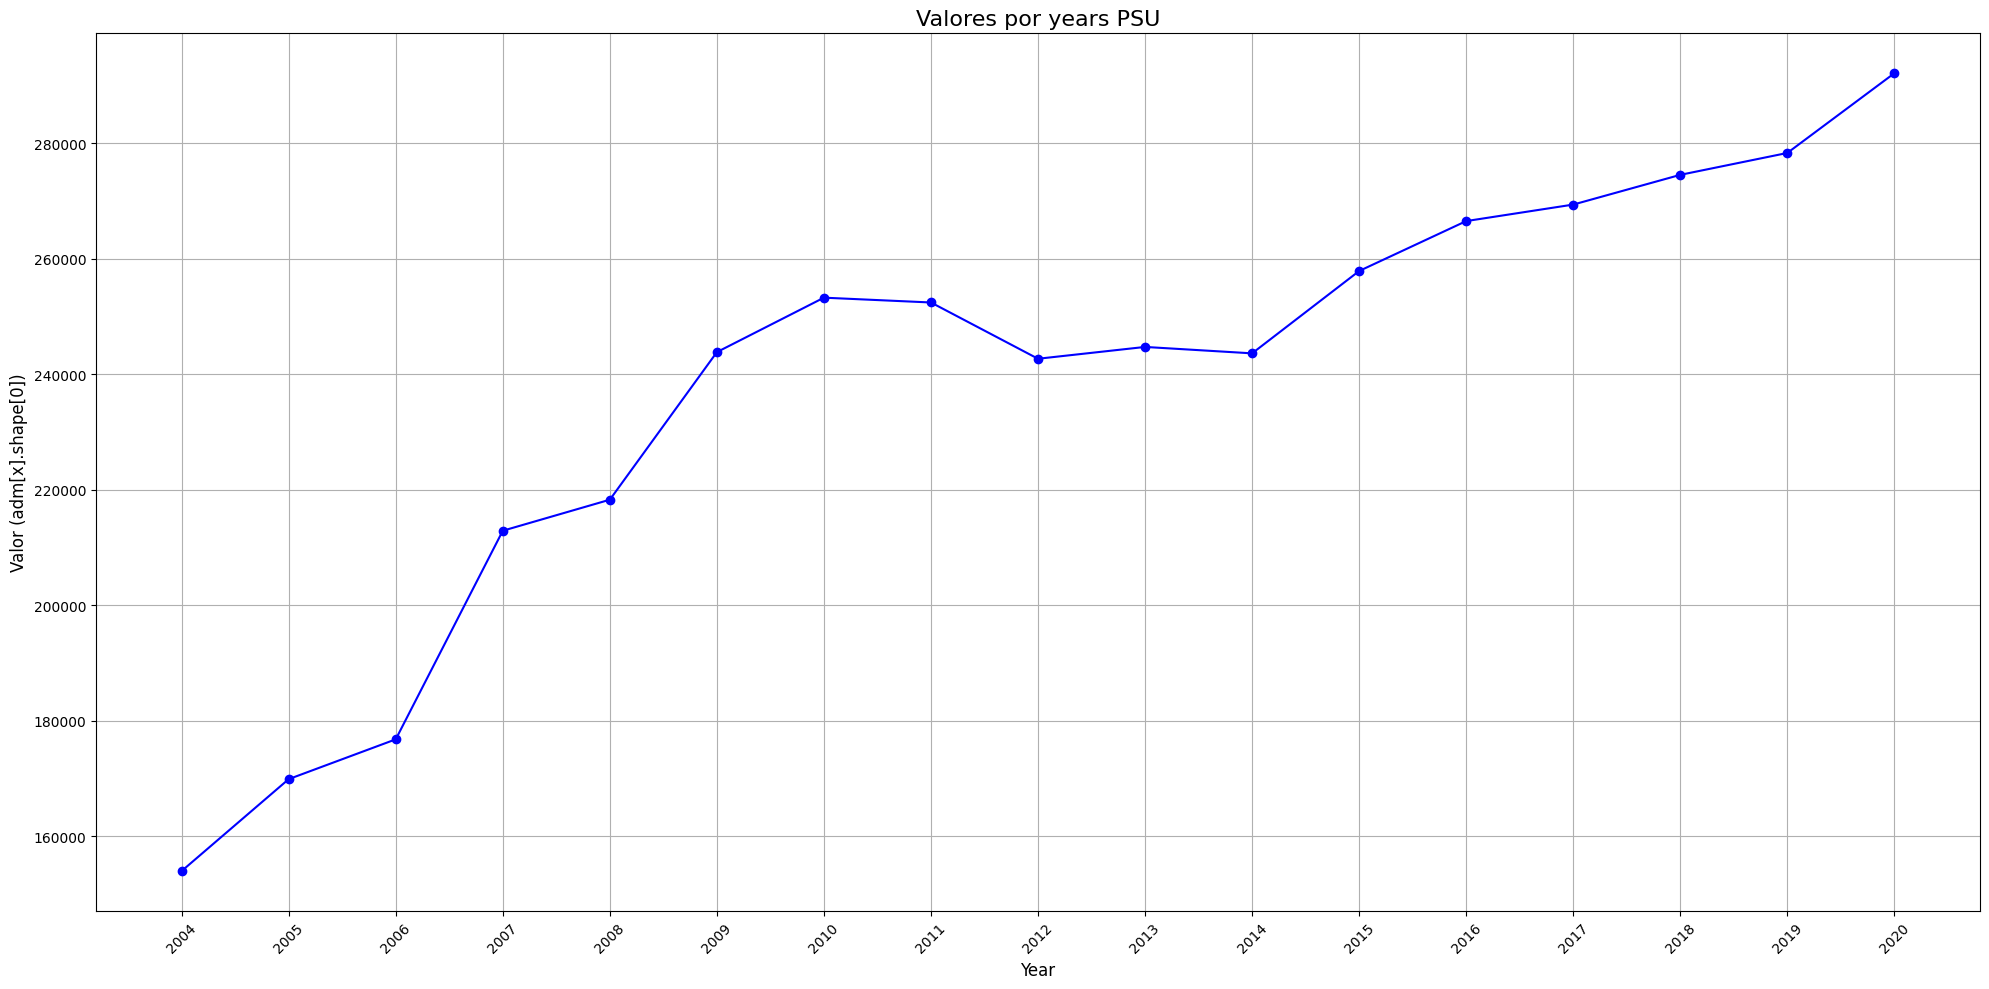

In [80]:
# PSU del 2004 al 2020 como ultimo año
tmp = [153982, 169888, 176778, 212889, 218261,
       243809, 253236, 252402, 242661, 244707,
       243596, 257852,266494, 269351, 274498,
       278287, 292091]

years = list(range(2004, 2021))

plt.figure(figsize=(20, 10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por years PSU', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

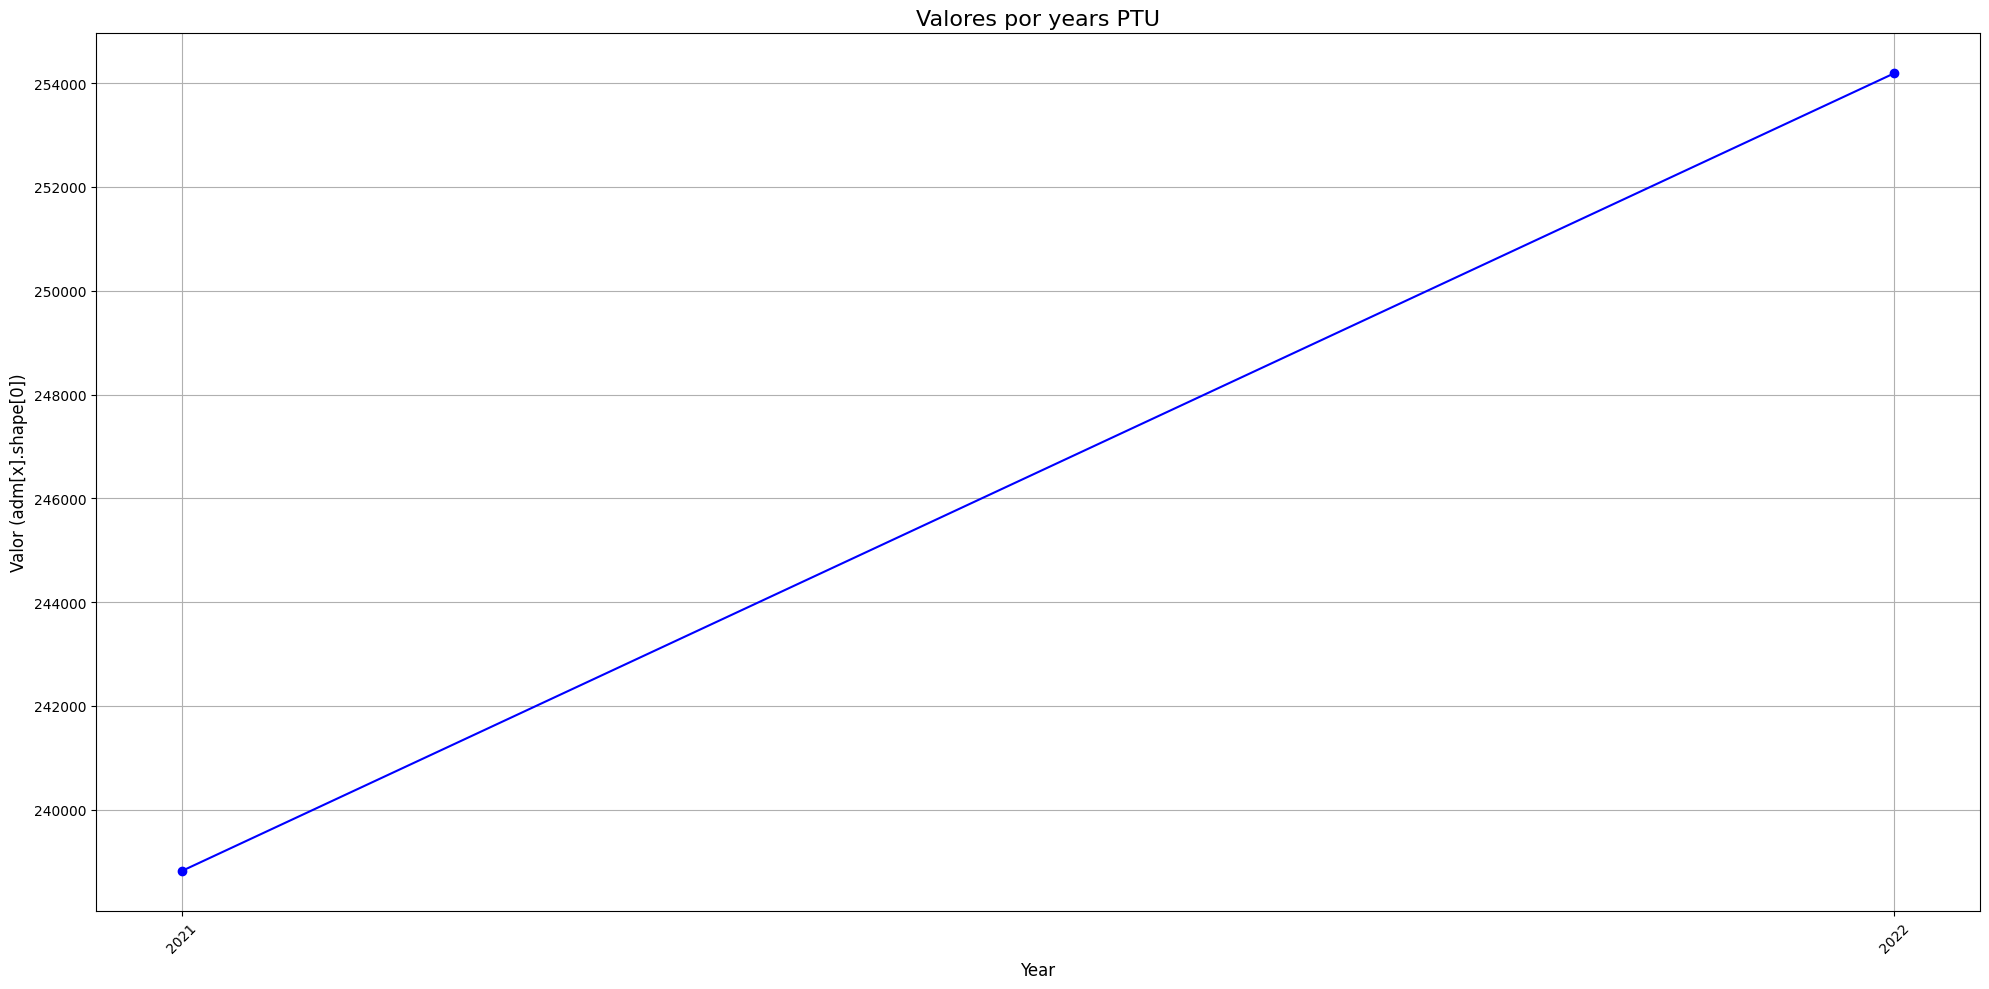

In [81]:
#PTU se hizo en el año 2021 y 2022
tmp =[238818, 254191]
years = [2021, 2022]

plt.figure(figsize=(20, 10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por years PTU', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

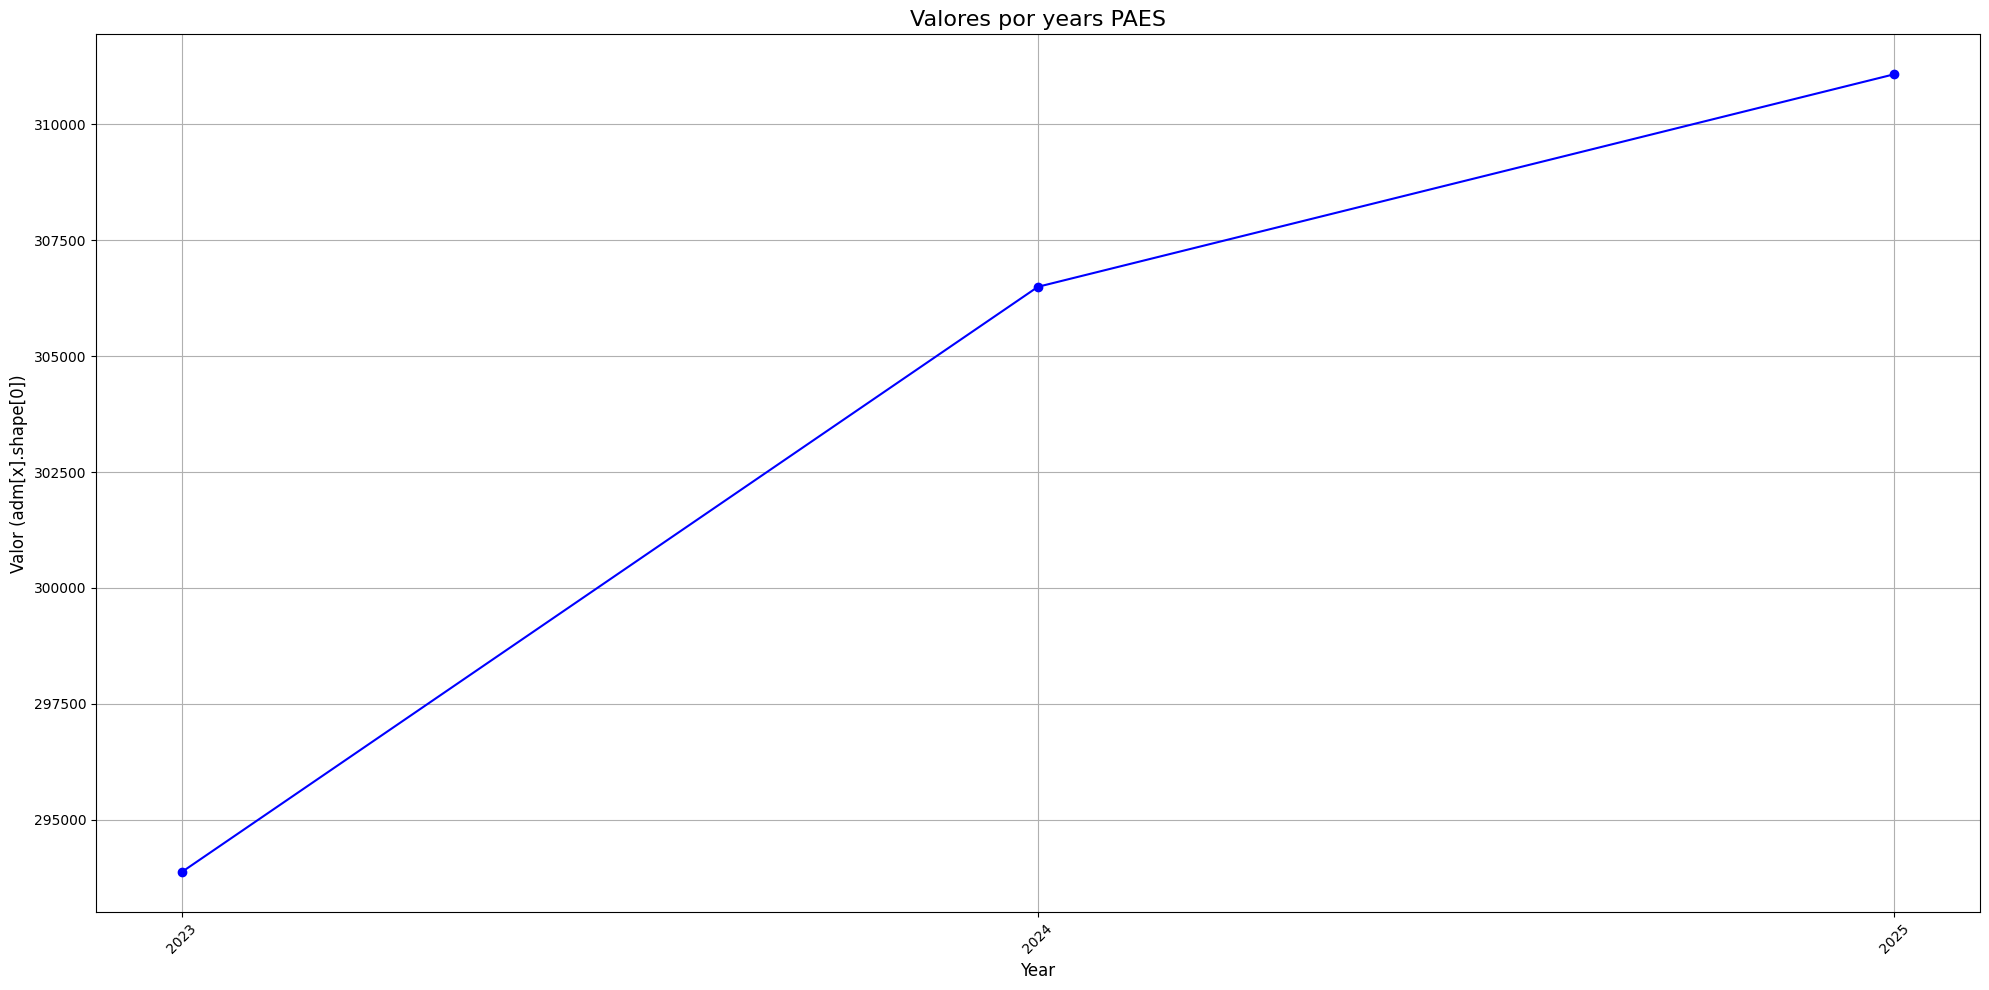

In [82]:
#PAES 2023 y 2025
tmp= [293865,306497, 311084]
years = [2023, 2024, 2025]

plt.figure(figsize=(20,10))
plt.plot(years, tmp, marker='o', linestyle='-', color='b')
plt.title('Valores por years PAES', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Valor (adm[x].shape[0])', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

##### Ahi podemos ver los distintos graficos de la PSU, PTU y PAES   (falta escribir mas, analizar y juntar los 4 grafifcos en 1, en la clase pasada mostraron como ahcerl, lo hago luego)

# Respuesta pregunta 3

# Respuesta pregunta 4

para detectar cuales son las comunas con mayor porcentaje, primero necesitamos analizar cual es la comuna de cada numero en la columna Codigo comuna

In [83]:
comuna = []
for num in range(2004, 2026):
    num = str(num)
    ruta = Path(f"raw_data/{num}")
    exel = ruta.glob("**/*.xlsx")
    for i in exel:
        if i.name == f"Libro_CódigosADM{num}_ArchivoC.xlsx" or  i.name == f"Libro_CódigosADM{num} _ArchivoC.xlsx": 
            #el or es por un error en como se llama el archivo en 2019
            comuna.append(pd.read_excel(i, sheet_name="Anexo - ComunasRegiones"))
print(len(comuna))
print(len(adm))

22
22


In [84]:
adm[0].head()

,ID_aux,GRUPO_DEPENDENCIA,RAMA,SITUACION_EGRESO,CODIGO_REGION,CODIGO_COMUNA,LENG_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,PROM_NOTAS,PTJE_NEM
0,id_001160071115,3,T1,1,1,201.0,469,457,437,426,63,682
1,id_0016900171627,3,H2,5,3,240.0,492,457,513,0,53,481
2,id_0016900571641,3,T1,5,2,225.0,391,442,0,396,48,376
3,id_0028900472899,3,H1,1,8,415.0,353,487,402,0,48,373
4,id_004500078456,2,H2,1,10,510.0,430,425,451,0,54,501


#### Ahora hemos obtenido el nombre de la comuna con su codigo ahora , abriremos el dataframe con los datos de los egresados, para posteriormente unirlas en un dataframe,es importante aclarar que solo se pueden tomar datos desde el 2018, puesto que desde ese año existe el apartado "matricula"

In [85]:
datos_egresado = []   # adm> lista con  df admision por years 

#archivos de admision estan en  ArchivoC_Adm20xx
print("Iniciando lectura ... \n \n")
for num in range(2018 ,2026):
    ruta = Path(f"raw_data/{num}")
    csv = ruta.glob(f"**/ArchivoMatr_Adm{num}*.csv")
    
    for archivo in csv:
        print(archivo)
        datos_egresado.append(pd.read_csv(archivo , sep = ";" , low_memory=False))
if len(datos_egresado) == 8:
    print("\n\nLectura correcta matricula 2018-2025")
else:
    print("\n\n Error en la lectura de datos, faltan archivos/mala lectura")




Iniciando lectura ... 
 

raw_data\2018\PROCESO-DE-ADMISIÓN-2018-MATRÍCULA-17-12-2024T16-04-30\Matricula_Admisión2018\ArchivoMatr_Adm2018.csv
raw_data\2019\PROCESO-DE-ADMISIÓN-2019-MATRÍCULA-17-12-2024T15-59-24\Matricula_Admisión2019\ArchivoMatr_Adm2019.csv
raw_data\2020\PROCESO-DE-ADMISIÓN-2020-MATRÍCULA-17-12-2024T15-54-39\Matricula_Admisión2020\ArchivoMatr_Adm2020.csv
raw_data\2021\PROCESO-DE-ADMISIÓN-2021-MATRÍCULA-17-12-2024T15-46-44\Matricula_Admisión2021\ArchivoMatr_Adm2021.csv
raw_data\2022\PROCESO-DE-ADMISIÓN-2022-MATRÍCULA-17-12-2024T15-42-10\Matricula_Admisión2022\ArchivoMatr_Adm2022.csv
raw_data\2023\PROCESO-DE-ADMISIÓN-2023-MATRÍCULA-17-12-2024T15-35-09\Matricula_Admisión2023\ArchivoMatr_Adm2023.csv
raw_data\2024\PROCESO-DE-ADMISIÓN-2024-MATRÍCULA-17-12-2024T14-38-28\ArchivoMatr_Adm2024.csv
raw_data\2025\PROCESO-DE-ADMISIÓN-2025-MATRÍCULA-23-04-2025T11-54-04\Matricula_Admisión2025\ArchivoMatr_Adm2025.csv


Lectura correcta matricula 2018-2025


In [86]:
datos_adm = adm[14:len(adm)]

columna = ['ID_aux', 'CODIGO_REGION', 'CODIGO_COMUNA']
for df in range(len(datos_adm)):
    datos_adm[df] = datos_adm[df][columna]
    
datos_adm[1].head()



,ID_aux,CODIGO_REGION,CODIGO_COMUNA
0,id_0000900070019,14.0,14101.0
1,id_0000900270084,15.0,15101.0
2,id_0000900370016,5.0,5502.0
3,id_0000900370067,5.0,5502.0
4,id_0000900370092,5.0,5502.0


In [87]:
datos_final = []
for i in range((len(datos_adm))):
    datos_final.append(pd.merge(datos_adm[i] , datos_egresado[i], on = 'ID_aux', how='inner'))

datos_final[1].head() 

,ID_aux,CODIGO_REGION,CODIGO_COMUNA,CODIGO_UNIV,CODIGO,VIA,PREFERENCIA,PTJE_POND,POND_ANYO_ACAD,TIPO_MATRICULA
0,id_0000900370016,5.0,5502.0,26,26010,1,1,"588,55",1,1
1,id_0000900470020,13.0,13104.0,38,38292,1,1,"586,5",1,1
2,id_0000900970026,11.0,11101.0,48,48005,1,1,"638,3",1,1
3,id_0001900370153,7.0,7405.0,35,35001,1,1,"583,35",1,1
4,id_0001900470113,13.0,13301.0,53,53306,1,1,"438,4",2,1


In [88]:
cantidad_comuna = []
for i in datos_final:
    i["CODIGO_COMUNA"] = i["CODIGO_COMUNA"].astype(int)
    seriee = i["CODIGO_COMUNA"].value_counts().head(10)
    dff = seriee.reset_index()
    dff.columns = ['CODIGO_COMUNA', 'Cantidad']
    cantidad_comuna.append((dff))
    

In [89]:
cantidad_comuna[6].head(10) 

,CODIGO_COMUNA,Cantidad
0,13101,4814
1,13119,3646
2,13201,3479
3,9101,3208
4,8101,2675
5,13114,2568
6,2101,2538
7,7101,2537
8,13123,2476
9,13110,2430


In [90]:
comuna_c = dcopy(comuna)
comuna_c = comuna_c[14:len(comuna)]
renombre_comuna = dcopy(cantidad_comuna)
comuna_c[1].head()
lista_final = []

df_10 = renombre_comuna[0]
df_look = comuna_c[0]
df_look = df_look[["COM", "COM_NOMBRE"]]
df_look.columns = ["CODIGO_COMUNA" , "NOMBRE_COMUNA"]
df = pd.merge(df_10 , df_look , on= "CODIGO_COMUNA" , how="left" )
lista_final.append(df[["CODIGO_COMUNA" , "NOMBRE_COMUNA" , "Cantidad"]])





for i in range(len(comuna_c) - 2):
    df_10 = renombre_comuna[i + 1]
    df_look = comuna_c[i + 1]
    df_look = df_look[["COD.COMUNA", "COM NOMBRE"]]
    df_look.columns = ["CODIGO_COMUNA" , "NOMBRE_COMUNA"]
    
    df = pd.merge(df_10 , df_look , on= "CODIGO_COMUNA" , how="left" )
    lista_final.append(df[["CODIGO_COMUNA" , "NOMBRE_COMUNA" , "Cantidad"]])
    
lista_final[1].head()



,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad
0,13101,SANTIAGO,5282
1,13119,MAIPU,3364
2,9101,TEMUCO,3218
3,13114,LAS CONDES,2835
4,13201,PUENTE ALTO,2783


In [91]:
lista_final[len(lista_final) - 1].head()  


,CODIGO_COMUNA,NOMBRE_COMUNA,Cantidad
0,13101,SANTIAGO,4814
1,13119,MAIPU,3646
2,13201,PUENTE ALTO,3479
3,9101,TEMUCO,3208
4,8101,CONCEPCION,2675


#### Con esto tenemos una lista que contiene los datos que responden a la pregunta , que comunas presentan los mayores porcentajes, mostrando el top 10

# Respuesta pregunta 5